In [1]:
import pandas as pd
import datetime
import random

from sqlalchemy import create_engine

from password import hoop_pwd
pwd = hoop_pwd.password

from nba_seer import *

modules imported
functions defined


In [2]:
# create sql conn and load game stats logs ----------------------

conn = create_engine('mysql+pymysql://root:%s@118.190.202.87:3306/nba_stats' % pwd)
game_stats_logs = pd.read_sql_table('game_stats_logs', conn)
game_stats_logs = game_stats_logs[game_stats_logs['GAME_TYPE'] != 'all_star']

print(str(len(game_stats_logs)) + ' player stats loaded.')

183356 player stats loaded.


In [3]:
# load player list ----------------------

all_players = nba_py.player.PlayerList(season='2017-18').info()

print('players list loaded')

players list loaded


In [4]:
def get_score(row):
    player_id = row['PERSON_ID']
    game_id = row['GAME_ID']
    stats = game_stats_logs[(game_stats_logs['PLAYER_ID'] == player_id) & 
                            (game_stats_logs['GAME_ID'] == game_id)].copy()
    #print(stats)
    stats['SCO'] = stats['PTS'] * 1 + stats['AST'] * 1.5 + \
    stats['OREB'] * 1 + stats['DREB'] * 0.7 + \
    stats['STL'] * 2 + stats['BLK'] * 1.8 + stats['TO'] * -1 + \
    stats['FGM'] * 0.4 + (stats['FGA'] - stats['FGM']) * -1 + stats['FG3M'] * 0.5
    return stats['SCO'].max()

In [5]:
game_date = game_stats_logs['GAME_DATE_EST'].drop_duplicates().apply(lambda x: x[:10])

In [6]:
players = pd.DataFrame()
for i in random.sample(list(game_date), 5):
    j = datetime.datetime.strptime(i, "%Y-%m-%d").date()
    games = get_games(j)
    players = players.append(get_players_p(games, game_stats_logs))
    print(str(j) + ' complete!')
else:
    print(len(players), ' players total!')

2015-11-16 complete!
2013-05-15 complete!
2014-11-16 complete!
2012-11-28 complete!
2013-03-27 complete!
943  players total!


In [7]:
players = get_exp_sco(players, game_stats_logs)

players['ACT_SCO'] = players.apply(get_score, axis = 1)
players['SCO_DIFF'] = players['EXP_SCO'] - players['ACT_SCO']
players['SCO_DIFF_PCT'] = players['SCO_DIFF'] / players['ACT_SCO']
print('test data loaded!')

ma20 complete!
ma10 complete!
ma5 complete!
min20 complete!
min10 complete!
min5 complete!
min_cov_20 complete!
sco_cov_20 complete!
sco cov less than 0 droped!
all done!
test data loaded!


In [23]:
players = players[players['ACT_SCO'] != 0].copy()

In [36]:
players[players['ACT_SCO'].notnull()].sort_values('SCO_COV_20')

,PERSON_ID,TEAM_ID,Location,GAME_ID,Against_Team_ID,MA_20,MA_10,MA_5,MIN_20,MIN_10,MIN_5,MIN_COV_20,SCO_COV_20,EXP_SCO,ACT_SCO,SCO_DIFF,SCO_DIFF_PCT
56,200765,1610612738,HOME,0021200211,1610612751,32.96,33.43,34.52,38.47,36.81,37.92,0.133,0.164,35.26,8.4,26.86,3.197619
93,201566,1610612760,AWAY,0021500155,1610612763,44.06,42.34,40.80,32.56,34.50,33.54,0.219,0.165,39.49,63.8,-24.31,-0.381034
180,2216,1610612763,HOME,0021200216,1610612761,24.64,25.17,24.33,37.08,36.90,36.92,0.072,0.169,25.38,36.1,-10.72,-0.296953
257,101108,1610612746,HOME,0021200219,1610612750,34.14,31.98,29.81,34.68,34.97,38.68,0.110,0.205,32.07,43.2,-11.13,-0.257639
25,201142,1610612760,HOME,0041200225,1610612763,37.35,35.18,33.83,40.48,43.66,44.72,0.139,0.206,42.30,18.8,23.50,1.250000
204,201142,1610612760,HOME,0021201065,1610612764,34.14,31.57,29.80,38.42,37.57,41.70,0.168,0.214,34.69,29.6,5.09,0.171959
262,202339,1610612746,HOME,0021200219,1610612750,30.55,29.61,27.82,18.87,19.24,19.96,0.214,0.218,15.77,5.3,10.47,1.975472
40,1495,1610612759,AWAY,0021200210,1610612753,36.41,37.91,34.73,30.91,31.55,32.47,0.171,0.220,31.95,29.1,2.85,0.097938
119,201609,1610612756,AWAY,0021200213,1610612765,31.59,32.59,34.44,32.89,32.62,30.77,0.110,0.229,29.31,11.3,18.01,1.593805
68,201935,1610612745,AWAY,0021400144,1610612760,33.56,35.00,32.46,34.55,36.49,39.43,0.249,0.231,34.44,23.9,10.54,0.441004


In [25]:
players['SCO_DIFF_PCT'].describe()

count    752.000000
mean       0.585474
std        6.800490
min      -61.700000
25%       -0.377911
50%       -0.063239
75%        0.583019
max       99.500000
Name: SCO_DIFF_PCT, dtype: float64

In [26]:
players['SCO_DIFF'].describe()

count    752.000000
mean      -0.423404
std        8.797746
min      -40.300000
25%       -5.242500
50%        0.280000
75%        5.222500
max       26.860000
Name: SCO_DIFF, dtype: float64

In [29]:
cov_diff = pd.DataFrame()
#cov_diff['cov'] = abs(players[['MIN_COV_20', 'SCO_COV_20']].mean(axis = 1))
cov_diff['cov'] = abs(players['MIN_COV_20'] * players['SCO_COV_20'])
cov_diff['diff'] = abs(players['SCO_DIFF_PCT'])
cov_diff.sort_values('cov')

,cov,diff
180,0.012168,0.296953
183,0.017316,0.097619
155,0.020580,0.492446
337,0.021008,1.207087
56,0.021812,3.197619
257,0.022550,0.257639
333,0.023622,0.708029
119,0.025190,1.593805
142,0.026220,0.038206
117,0.026928,0.307009


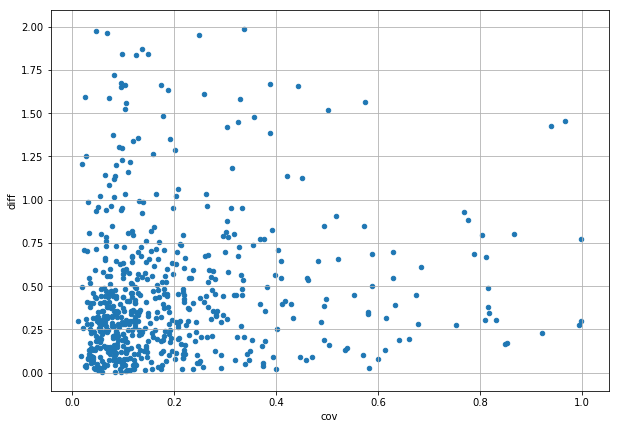

In [38]:
%matplotlib inline
cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)].plot(x='cov', y='diff', kind='scatter', grid=True, figsize=(10, 7))

In [40]:
cov_diff_1 = cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)]
cov_diff_1['cov'].corr(cov_diff_1['diff'])

0.11338500951957731

In [13]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = cov_diff['diff'][cov_diff['diff'].notnull()].apply(lambda x: round(x)).sort_values()

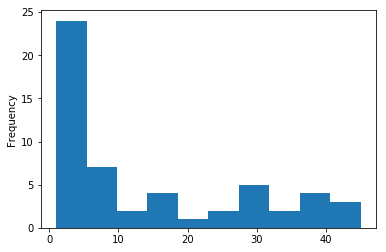

In [14]:
h.value_counts().plot(kind='hist')

In [15]:
test_p = players[players['PERSON_ID'] == 203461]

In [16]:
test_p_log = get_last_n_game_logs(game_stats_logs, 203461, '1400200189', 10)
test_p_log

,MINS,PTS,AST,OREB,DREB,STL,BLK,TO,FGM,FGA,FG3M
74423,13.90,9.0,1.0,0.0,3.0,0.0,0.0,3.0,4.0,8.0,0.0
74618,13.93,4.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,4.0,0.0
75081,20.08,12.0,1.0,0.0,5.0,2.0,1.0,0.0,6.0,7.0,0.0
75739,11.93,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
76052,0.02,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77200,8.80,2.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0
77492,16.95,4.0,2.0,0.0,3.0,0.0,2.0,0.0,1.0,4.0,0.0
77721,28.60,10.0,4.0,1.0,6.0,0.0,0.0,0.0,4.0,8.0,0.0
78489,14.03,6.0,0.0,1.0,2.0,1.0,0.0,0.0,3.0,7.0,0.0
78745,32.08,20.0,1.0,1.0,2.0,3.0,0.0,2.0,9.0,14.0,0.0


In [17]:
convert_to_36 = lambda x: x[['PTS', 'AST', 'OREB', 'DREB', 'STL', 'BLK', 
                             'TO', 'FGM', 'FGA', 'FG3M']] * 36 / x['MINS']
stats = test_p_log.apply(convert_to_36, axis=1)
stats['SCO'] = stats['PTS'] * 1 + stats['AST'] * 1.5 + stats['OREB'] * 1 + stats['DREB'] * 0.7 + \
        stats['STL'] * 2 + stats['BLK'] * 1.8 + stats['TO'] * -1 + \
        stats['FGM'] * 0.4 + (stats['FGA'] - stats['FGM']) * -1 + stats['FG3M'] * 0.5
stats

,PTS,AST,OREB,DREB,STL,BLK,TO,FGM,FGA,FG3M,SCO
74423,23.309353,2.589928,0.000000,7.769784,0.000000,0.000000,7.769784,10.359712,20.719424,0.0,18.647482
74618,10.337401,0.000000,0.000000,7.753051,0.000000,2.584350,0.000000,5.168701,10.337401,0.0,17.315147
75081,21.513944,1.792829,0.000000,8.964143,3.585657,1.792829,0.000000,10.756972,12.549801,0.0,43.386454
75739,12.070411,3.017603,0.000000,3.017603,0.000000,0.000000,0.000000,3.017603,12.070411,0.0,10.863370
76052,3600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3600.000000
77200,8.181818,0.000000,4.090909,12.272727,0.000000,4.090909,0.000000,4.090909,4.090909,0.0,29.863636
77492,8.495575,4.247788,0.000000,6.371681,0.000000,4.247788,0.000000,2.123894,8.495575,0.0,21.451327
77721,12.587413,5.034965,1.258741,7.552448,0.000000,0.000000,0.000000,5.034965,10.069930,0.0,23.664336
78489,15.395581,0.000000,2.565930,5.131860,2.565930,0.000000,0.000000,7.697790,17.961511,0.0,19.501069
78745,22.443890,1.122195,1.122195,2.244389,3.366584,0.000000,2.244389,10.099751,15.710723,0.0,29.738155
